# Diabetes dataset prediction
Analysis of the diabetes dataset to predict the disease progression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots
pd.set_option('display.max_rows', 2536)
pd.set_option('display.max_columns', 100)

In [2]:
def plot_polyfit(x, y, max_degree):
    # crea un array di gradi del polinomio da 1 a max_degree
    degrees = np.arange(1, max_degree + 1)
    # crea un grafico con i dati originali
    plt.scatter(x, y)
    # itera sui gradi del polinomio
    for degree in degrees:
        # calcola i coefficienti del polinomio di grado degree
        coeffs = np.polyfit(x, y, degree)
        # crea una funzione polinomiale basata sui coefficienti calcolati
        poly = np.poly1d(coeffs)
        # crea un array di valori x per il grafico della regressione polinomiale
        x_fit = np.linspace(np.min(x), np.max(x), 100)
        # calcola i valori y per il grafico della regressione polinomiale
        y_fit = poly(x_fit)
        # plotta la regressione polinomiale di grado degree
        plt.plot(x_fit, y_fit, label=f'Grado {degree}')
    # aggiunge la legenda al grafico
    plt.legend()
    # mostra il grafico
    plt.show()

## Exploratory data analysis

In [3]:
from sklearn.datasets import load_diabetes
# to import the diabetes patients dataset

data = load_diabetes()
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [18]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [4]:
features_all = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
features = ['age', 'bmi', 's3']
target = ['target']

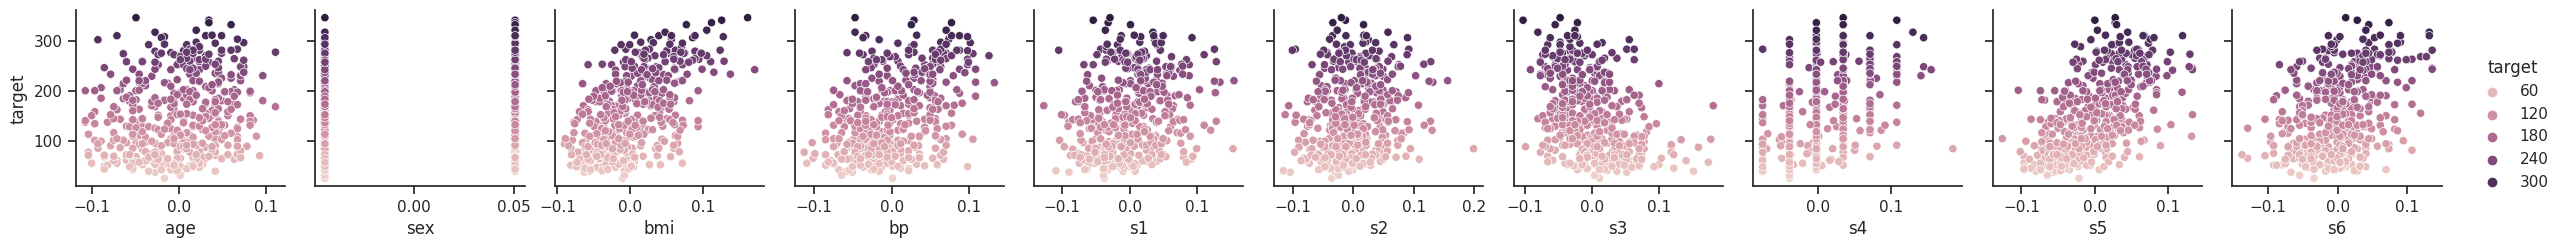

In [5]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="target", 
             x_vars=features_all,
             y_vars=target)

In [6]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(df[features_all].values, df[target].values, test_size = 0.05, random_state=1)

These features, age and bmi, are the best indicator for target variable prediction.
But I'll do both fit (with 2 features and with all features).

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

# Initialize the dictonary for error metrics
parameter_errors = dict()

for deg in range(12):

    # crea le features polinomiali
    poly = PolynomialFeatures(degree=deg)
    x_poly = poly.fit_transform(X_train)

    # esegue la regressione lineare
    reg = LinearRegression(n_jobs=-1)
    reg.fit(x_poly, y_train)

    # Make a prediction
    X_test_poly = poly.fit_transform(X_test)
    y_pred = reg.predict(X_test_poly)

    parameter_errors[deg] = {'MSE': mean_squared_error(y_test, y_pred),
                             'ME':  max_error(y_test, y_pred),
                             'MAE': mean_absolute_error(y_test, y_pred)}
    print("Deg", deg, 'done')

Deg 0 done
Deg 1 done
Deg 2 done
Deg 3 done
Deg 4 done
Deg 5 done
Deg 6 done
Deg 7 done
Deg 8 done
Deg 9 done
Deg 10 done
Deg 11 done


In [17]:
errors_deg = pd.DataFrame(parameter_errors).T
errors_deg.sort_values(['MSE', 'ME', 'MAE'])

,MSE,ME,MAE
2,2792.123454,132.410391,40.233274
1,2946.287170,137.427024,39.863231
0,5182.650006,180.157518,57.093805
3,48986.497176,887.922139,125.967783
11,168468.237737,1295.080204,265.860370
10,168468.835304,1295.056860,265.864418
9,168468.873554,1295.051170,265.865457
8,168469.286235,1295.054206,265.865818
7,168469.829912,1295.060264,265.865329
6,168488.399472,1295.180066,265.875917
